# 딥러닝 기본 프레임 만들기

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.datasets import mnist
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# MNIST 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원 변환 후, 테스트셋과 학습셋으로 나누어 줍니다.
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

# 원-핫 인코딩 형태로 변환해 줍니다.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))               # 출력값은 10개 중에 하나.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- compile 함수 인자 

  - loss (손실 함수):
    - 손실 함수는 모델이 예측한 값과 실제 타깃 값 사이의 차이를 측정하는 함수입니다. 이 차이를 최소화하는 방향으로 모델을 학습시킵니다. 주어진 문제의 경우, 'categorical_crossentropy'를 사용했습니다. 이는 다중 클래스 분류 문제에서 사용되는 일반적인 손실 함수입니다. 라벨이 원-핫 인코딩된 벡터 형태일 때 사용됩니다.

  - optimizer (옵티마이저):
    - 옵티마이저는 모델의 가중치를 업데이트하는 알고리즘을 정의합니다. 'adam'은 Adam 최적화 알고리즘을 사용하겠다는 의미입니다. Adam은 효율적인 경사 하강법의 한 종류로 많이 사용됩니다. 학습률(learning rate)과 같은 하이퍼파라미터를 조정하지 않아도 자동으로 적절한 값을 선택하는 장점이 있습니다.

  - metrics (평가 지표):
    - 모델을 컴파일할 때, 훈련 중에 모니터링하고자 하는 평가 지표를 설정합니다. 주로 'accuracy'를 사용하여 정확도를 모니터링합니다. 이 외에도 다른 지표들도 설정할 수 있으며, 리스트 형태로 여러 개의 지표를 동시에 사용할 수도 있습니다.

In [6]:
# 신경망 모델 컴파일 하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # 분류 문제이므로 loss는 categorical_crossentropy

**ModelCheckpoint 콜백**
- 특정 조건을 만족할 때마다 모델의 가중치를 저장합니다. 이를 통해 학습 중간 중간의 최상의 모델을 저장하여, 학습이 중지되었을 때 또는 최대 에폭(maximum epoch)이 다 되었을 때 최상의 성능을 보이는 모델을 사용할 수 있게 됩니다.
  - filepath: 
    - 가중치를 저장할 파일의 경로를 지정합니다. 예를 들어, modelpath라는 변수에 저장 경로를 지정해두었다면, 해당 경로에 모델의 가중치가 저장됩니다.
  - monitor: 
    - 모델을 저장할 때 기준이 되는 값입니다. 주로 손실 함수(loss)나 평가 지표(metrics)를 지정합니다. 'val_loss'로 설정하면 검증 데이터의 손실 함수 값을 기준으로 최적의 모델을 저장합니다. 다른 평가 지표를 사용하려면 해당 지표의 이름을 지정하면 됩니다.
  - verbose:
    - 값이 0일 경우, 아무런 출력이 없습니다.
    - 값이 1일 경우, 저장 시 메시지를 출력합니다.
    - 값이 2일 경우, 에폭마다 한 줄씩 출력합니다.
  - save_best_only:
    - True로 설정하면, 최적의 모델만 저장합니다. 이는 monitor에서 지정한 지표의 값이 이전보다 좋을 때만 모델을 저장하게 됩니다. False로 설정하면, 매 에폭마다 모델을 저장합니다.

**EarlyStopping**
- Keras에서 모델 학습 도중에 학습을 조기 종료하는 콜백(callback) 함수입니다. 이 콜백은 학습 중에 지정한 조건을 만족할 때 학습을 중단시키는 역할을 합니다. 이를 통해 과적합(overfitting)을 방지하고, 최적의 모델을 찾을 수 있게 됩니다.
  - monitor:
    - 모델을 학습 중지 여부를 판단할 지표를 지정합니다. 주로 손실 함수(loss)나 평가 지표(metrics)를 지정합니다. 'val_loss'로 설정하면 검증 데이터의 손실 함수 값을 기준으로 학습을 조기 종료하게 됩니다.
  - patience:
    - 지정한 값만큼의 에폭(epoch) 동안 개선되지 않은 경우 학습을 중단합니다. 예를 들어, patience=10으로 설정하면 10 에폭 동안 검증 데이터의 손실 함수 값이 개선되지 않으면 학습을 종료합니다.

In [7]:
# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_MLP.hdf5"                      # 모델을 저장할 파일명 지정
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)  # 모델 저장 조건 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)  # 학습 자동 중단 설정

**model.fit()**
- Keras 라이브러리를 사용하여 딥러닝 모델을 학습시키는 메서드입니다. 주어진 데이터로 모델을 학습시키고, 검증 데이터를 사용하여 모델의 성능을 평가하며, Early Stopping과 Model Checkpointing과 같은 콜백(callback) 함수를 활용하여 학습 과정을 조절할 수 있습니다.
  - X_train: 
    - 학습 데이터의 입력(features)을 의미합니다. 모델은 이 데이터를 사용하여 학습하게 됩니다.
  - y_train: 
    - 학습 데이터의 출력(labels)을 의미합니다. 모델은 이 데이터를 예측하도록 학습됩니다.
  - validation_split: 
    - 학습 데이터에서 일정 비율을 검증 데이터(validation data)로 사용합니다. 이를 통해 학습 중에 모델의 성능을 모니터링하고, 과적합(overfitting)을 방지하는데 도움이 됩니다.
  - epochs: 
    - 학습할 에포크(epoch) 수를 지정합니다. 에포크란 전체 학습 데이터를 한 번 전부 사용하여 학습하는 것을 의미합니다. 즉, 데이터를 epochs번 반복해서 학습합니다.
  - batch_size: 
    - 학습 데이터를 한 번에 모델에 넣을 때의 미니배치 크기를 지정합니다. 미니배치는 데이터를 일정 크기로 나눠서 학습하는 방법으로, 메모리를 효율적으로 사용할 수 있고, 학습 속도를 높이는데 도움이 됩니다.
  - verbose: 
    - 학습 과정 중에 출력되는 정보의 양을 결정합니다. 0이면 출력이 없고, 1이면 진행 막대와 함께 출력하고, 2이면 진행 막대 없이 출력합니다.
  - callbacks: 
    - 모델 학습 과정을 제어하기 위해 사용되는 콜백 함수들의 리스트를 지정합니다. 주로 Early Stopping과 Model Checkpointing을 사용합니다.
    - EarlyStopping: 
      - 모델 학습 중에 검증 데이터에 대한 성능이 더이상 개선되지 않으면 학습을 조기 종료시킵니다. 이를 통해 과적합을 방지하고 학습 속도를 향상시킬 수 있습니다.
    - ModelCheckpoint: 
      - 모델의 가중치를 저장하는 콜백으로, 학습 중 가장 성능이 좋은 모델을 저장할 수 있습니다. 이후에 해당 모델을 불러와 사용할 수 있습니다.

In [8]:
# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18779, saving model to .\MNIST_MLP.hdf5


c:\Python\311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.18779 to 0.13865, saving model to .\MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13865 to 0.11302, saving model to .\MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11302 to 0.09585, saving model to .\MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.09585 to 0.09138, saving model to .\MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09138 to 0.08693, saving model to .\MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.08693 to 0.08605, saving model to .\MNIST_MLP.hdf5

Epoch 8: val_loss improved from 0.08605 to 0.08187, saving model to .\MNIST_MLP.hdf5

Epoch 9: val_loss did not improve from 0.08187

Epoch 10: val_loss improved from 0.08187 to 0.07978, saving model to .\MNIST_MLP.hdf5

Epoch 11: val_loss did not improve from 0.07978

Epoch 12: val_loss did not improve from 0.07978

Epoch 13: val_loss improved from 0.07978 to 0.07924, saving model to .\MNIST_MLP.hdf5

Epoch 14: val_loss did not improve from 0.07924

Epoch 15: val_loss did not i

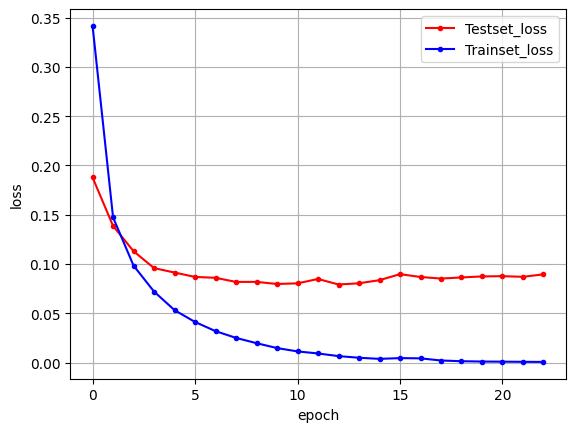

In [9]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()